### Imports

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas 

### Data Preparation

In [4]:
data = pandas.read_csv('./data/Learning/Training_set_new.csv')
test = pandas.read_csv('./data/Learning/Test_set.csv')
gtTrain = pandas.read_csv('./data/21/groundTruthEdited.csv')
gtTest = pandas.read_csv('./data/17/groundTruthEdited.csv')

x_train_set = data[['x','y','z']]

target = data['brakingStatus']
# xtrain_set = [data[['x','y','z']][i:i+1].iterrows() for i in range(0,train_set)]
# target = [data['brakingStatus'][i:i+1] for i in range(0,train_set)]

x_test_set = test[['x','y','z']]
y_test_set = test['brakingStatus']


In [5]:
x_train_set = np.array(x_train_set,dtype=float)

target = np.array(target,dtype=float)

x_test_set =  np.array(x_test_set,dtype=float)
y_test_set =  np.array(y_test_set,dtype=float)

In [6]:
x_train_set_array= []
for i in x_train_set:
    x_train_set_array.append([i])
x_train_set_array = np.array(x_train_set_array, dtype = float)

x_test_set_array= []      
for i in x_test_set:
    x_test_set_array.append([i])
x_test_set_array = np.array(x_test_set_array, dtype = float)

y_test_set_array= []      
for i in y_test_set:
    y_test_set_array.append([i])
y_test_set_array = np.array(y_test_set_array, dtype = float)

target_array= []      
for i in target:
    target_array.append([i])
target_array = np.array(target_array, dtype = float)




In [7]:
x_train_set_array_reshape = np.squeeze(x_train_set_array, axis = 1)
target_array_reshape = np.squeeze(target_array, axis = 1)
x_test_set_array_reshape = np.squeeze(x_test_set_array, axis=1)
y_test_set_array_reshape = np.squeeze(y_test_set_array, axis=1)

In [8]:
x_test_set_array.shape

(20675, 1, 3)

In [33]:
gtTest

,evento,inicio,fim,startIndexinAcc,endIndexinAcc,startIndexinAccLinear,endIndexinAccLinear
0,troca_faixa_direita_agressiva,16.1,18.5,806,958,806,958
1,troca_faixa_direita_agressiva,25.1,27.6,1264,1416,1264,1416
2,freada_agressiva,141.0,143.3,7173,7325,7173,7325
3,freada_agressiva,151.3,153.2,7683,7834,7683,7834
4,freada_agressiva,165.9,168.0,8396,8599,8396,8599
5,freada_agressiva,220.6,222.6,11198,11349,11198,11349
6,freada_agressiva,234.0,236.2,11911,12062,11911,12062
7,freada_agressiva,248.1,250.8,12624,12776,12624,12776
8,aceleracao_agressiva,288.0,290.6,14661,14813,14661,14813
9,aceleracao_agressiva,304.6,308.2,15476,15730,15476,15730


### RNN model

In [9]:
model = Sequential()

In [10]:
model.add(LSTM(1,batch_input_shape= (None,10,3),return_sequences= False))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(
    np.array([x_train_set_array_reshape[i:i+10] for i in range(0,18000)]),
    np.array([target_array_reshape[i+9] for i in range(0,18000)]),
    epochs=100,
    validation_data=(np.array([x_train_set_array_reshape[i:i+10] for i in range(18500,20000)]),np.array([target_array_reshape[i+9] for i in range(18500,20000)])),
    batch_size=128)
# history = model.fit(
#     x_train_set_array[5000:5010],target_array[5000:5010],epochs=100,
#     validation_data=(x_train_set_array[18500:20000],target_array[18500:20000]),
#     batch_size=128)

Train on 18000 samples, validate on 1500 samples
Epoch 1/100
18000/18000 [==============================] - 1s 63us/step - loss: 0.0312 - acc: 0.9615 - val_loss: 0.0880 - val_acc: 0.9073
Epoch 2/100
18000/18000 [==============================] - 1s 65us/step - loss: 0.0300 - acc: 0.9628 - val_loss: 0.0861 - val_acc: 0.9107
Epoch 3/100
18000/18000 [==============================] - 1s 64us/step - loss: 0.0288 - acc: 0.9644 - val_loss: 0.0845 - val_acc: 0.9120
Epoch 4/100
18000/18000 [==============================] - 1s 62us/step - loss: 0.0282 - acc: 0.9650 - val_loss: 0.0841 - val_acc: 0.9120
Epoch 5/100
18000/18000 [==============================] - 1s 61us/step - loss: 0.0279 - acc: 0.9655 - val_loss: 0.0826 - val_acc: 0.9127
Epoch 6/100
18000/18000 [==============================] - 1s 62us/step - loss: 0.0276 - acc: 0.9658 - val_loss: 0.0799 - val_acc: 0.9147
Epoch 7/100
18000/18000 [==============================] - 1s 62us/step - loss: 0.0275 - acc: 0.9663 - val_loss: 0.0783 - v

18000/18000 [==============================] - 1s 62us/step - loss: 0.0266 - acc: 0.9697 - val_loss: 0.0760 - val_acc: 0.9220
Epoch 60/100
18000/18000 [==============================] - 1s 61us/step - loss: 0.0266 - acc: 0.9697 - val_loss: 0.0761 - val_acc: 0.9220
Epoch 61/100
18000/18000 [==============================] - 1s 61us/step - loss: 0.0266 - acc: 0.9697 - val_loss: 0.0758 - val_acc: 0.9220
Epoch 62/100
18000/18000 [==============================] - 1s 60us/step - loss: 0.0266 - acc: 0.9695 - val_loss: 0.0759 - val_acc: 0.9220
Epoch 63/100
18000/18000 [==============================] - 1s 59us/step - loss: 0.0266 - acc: 0.9698 - val_loss: 0.0759 - val_acc: 0.9220
Epoch 64/100
18000/18000 [==============================] - 1s 76us/step - loss: 0.0265 - acc: 0.9694 - val_loss: 0.0760 - val_acc: 0.9220
Epoch 65/100
18000/18000 [==============================] - 1s 64us/step - loss: 0.0266 - acc: 0.9698 - val_loss: 0.0761 - val_acc: 0.9220
Epoch 66/100
18000/18000 [==============

In [56]:
[x_train_set_array[i:i+10] for i in range(1,100)]

[array([[[ 2.02217755, -0.12587721,  0.14135243]],
 
        [[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.71053093]]]),
 array([[[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.7105309

In [22]:
results = model.predict(np.array([x_test_set_array_reshape[i:i+10] for i in range(0,len(x_test_set_array)-10)]))

In [23]:
# results[11198:11349]
len(results)
results.shape

(20665, 1)

<function matplotlib.pyplot.show(*args, **kw)>

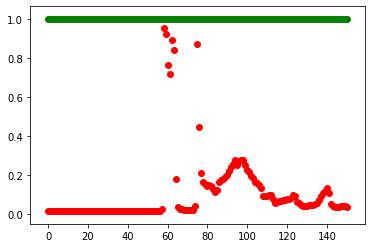

In [38]:
# plt.scatter(range(20665),results,c='r')
# plt.scatter(range(20665),y_test_set_array_reshape[:20665],c='g')
# plt.show

plt.scatter(range(151),results[7683:7834],c='r')
plt.scatter(range(151),y_test_set_array_reshape[7683:7834],c='g')
plt.show


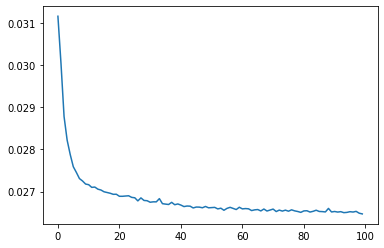

In [25]:
plt.plot(history.history['loss'])
plt.show()

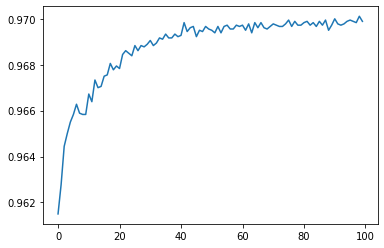

In [26]:
plt.plot(history.history['acc'])
plt.show()

### Training by just 'X' 

In [44]:
x_train_set_X = data['x']
x_test_set_X = test['x']


x_train_set_X = np.array(x_train_set_X,dtype= float)
x_test_set_X = np.array(x_test_set_X,dtype= float)


In [45]:
x_train_set_array_X= []      
for i in x_train_set:
    x_train_set_array_X.append([i])
x_train_set_array_X = np.array(x_train_set_array_X, dtype = float)

x_test_set_array_X= []      
for i in x_test_set:
    x_test_set_array_X.append([i])
x_test_set_array_X = np.array(x_test_set_array_X, dtype = float)

In [46]:
model_X = Sequential()

In [47]:
model_X.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [49]:
model_X.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [50]:
model_X.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
